<a id='item41'></a>


In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

<a id='item42'></a>


In [15]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten


## Convolutional Layer with One set of convolutional and pooling layers


In [16]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')

In [19]:
X_train.shape

(60000, 28, 28, 1)

Let's normalize the pixel values to be between 0 and 1


In [20]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

Next, let's convert the target variable into binary categories


In [21]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

<a id='item43'></a>


## Convolutional Layer with two sets of convolutional and pooling layers


Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.


In [22]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.


In [23]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
300/300 - 4s - 12ms/step - accuracy: 0.8689 - loss: 0.4653 - val_accuracy: 0.9582 - val_loss: 0.1405
Epoch 2/10
300/300 - 2s - 8ms/step - accuracy: 0.9636 - loss: 0.1233 - val_accuracy: 0.9735 - val_loss: 0.0890
Epoch 3/10
300/300 - 2s - 8ms/step - accuracy: 0.9735 - loss: 0.0867 - val_accuracy: 0.9802 - val_loss: 0.0654
Epoch 4/10
300/300 - 2s - 8ms/step - accuracy: 0.9788 - loss: 0.0709 - val_accuracy: 0.9804 - val_loss: 0.0635
Epoch 5/10
300/300 - 2s - 8ms/step - accuracy: 0.9823 - loss: 0.0596 - val_accuracy: 0.9847 - val_loss: 0.0502
Epoch 6/10
300/300 - 2s - 7ms/step - accuracy: 0.9836 - loss: 0.0532 - val_accuracy: 0.9854 - val_loss: 0.0467
Epoch 7/10
300/300 - 2s - 7ms/step - accuracy: 0.9853 - loss: 0.0479 - val_accuracy: 0.9871 - val_loss: 0.0428
Epoch 8/10
300/300 - 5s - 15ms/step - accuracy: 0.9870 - loss: 0.0416 - val_accuracy: 0.9870 - val_loss: 0.0408
Epoch 9/10
300/300 - 4s - 14ms/step - accuracy: 0.9885 - loss: 0.0381 - val_accuracy: 0.9886 - val_loss: 0.038

In [24]:
model.save("mnist_cnn_model.h5")

In [25]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.12951781e-07, 1.00546977e-07, 6.73149816e-06, ...,
        9.99955773e-01, 3.81091809e-06, 3.28368657e-07],
       [1.14206496e-05, 8.99533843e-05, 9.99884844e-01, ...,
        7.05658242e-13, 1.32470204e-05, 6.52587359e-13],
       [5.19770947e-06, 9.99421239e-01, 3.62444407e-05, ...,
        2.18160232e-04, 2.57167976e-05, 1.30400986e-05],
       ...,
       [1.20751206e-12, 9.23433899e-11, 1.05192235e-11, ...,
        1.52931445e-08, 2.66058309e-09, 8.77149020e-08],
       [4.10027951e-07, 2.05578415e-10, 1.45258527e-09, ...,
        3.81747540e-08, 1.87648796e-02, 1.51445761e-06],
       [1.45475281e-06, 3.67240038e-09, 5.72011743e-07, ...,
        5.04924661e-13, 2.77178674e-06, 9.79670567e-10]], dtype=float32)

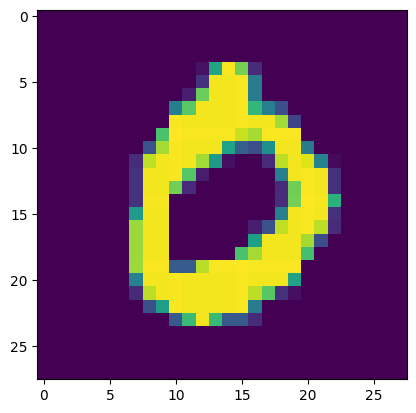

In [26]:
import matplotlib.pyplot as plt
plt.imshow(X_test[3])

In [42]:
X_test[10]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [27]:
import numpy as np
for i in range(10000):
    print(np.argmax(y_pred[i]))

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
9
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
2
9
8
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
9
8
7
2
3
0
4
4
2
4
1
9
5
7
7
2
8
2
0
8
5
7
7
9
1
8
1
8
0
3
0
1
9
9
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
8
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
3
6
1
3
8
1
0
5
1
3
1
5
5
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
3
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
0
6
4
9
5
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
0
9
4
0
6
